# Language Classification with Naive Bayes and Subword

Naive Bayes classifiers have been applied broadly, particularly Natural Language Processing(NLP).
Other alternatives for NLP problems: Support Vector Machine (SVM), neural networks and so on. However, Naive Bayes classifiers are simple, fast, reliable and accurate in a number of applications of NLP.

## Project Outline

[**Task 1**](#task1): Exploratory Data Analysis + Visualization

[**Task 2**](#task2): Data Cleaning and Preprocessing

Clean and preprocess raw data for language classification tasks

[**Task 3**](#task3): Naive Bayes Model and Training

Partially address class imbalance in training data

[**Task 4**](#task4): Highlighting Problems with Basic Model and Simple Fixes

[**Task 5**](#task5): Advanced Approach to Further Improve Performance

Use subword units from Machine Translation theory to mitigate negative effects of class imbalance and improve model performance

Use advanced Natural Language Processing techniques to improve model performance and address class imbalance (subword units)

<a id='intro'></a>
# Introduction
Build a language classifier that can differentiate between Slovak, Czech, and English languages. You will have tools to address class imbalance effectively, and build an accurate language classifier.

## [Slovak Wikipedia Entry](https://sk.wikipedia.org/wiki/Jazveč%C3%ADk)
Mnohí ľudia, ktorí vidia na ulici jazvečíka s podlhovastým telom vôbec nevedia o tom, že tento malý štvornohý a veľmi obľúbený spoločník je pri dobrom výcviku obratným, vynikajúcim a spoľahlivým poľovným psom. Ako poľovný pes je mnohostranne využiteľný, okrem iného ako durič na brlohárenie. Králičí jazvečík sa dokáže obratne pohybovať v králičej nore. S inými psami a deťmi si nie vždy rozumie.

## [Czech Wikipedia Entry](https://cs.wikipedia.org/wiki/Jezevč%C3%ADk)
Úplně první zmínky o psech podobných dnešním jezevčíkům nacházíme až ve Starém Egyptě, kde jsou vyobrazeni na soškách a rytinách krátkonozí psi s dlouhým hřbetem a krátkou srstí. Jednalo se ale o neustálený typ bez ustáleného jména. Další zmínky o jezevčících nacházíme až ve 14 - 15. století. Jedná se o psa, který se nejvíce podobá dnešnímu typu hladkosrstého standardního jezevčíka.


## [English Wikipedia Entry](https://en.wikipedia.org/wiki/Dachshund)
While classified in the hound group or scent hound group in the United States and Great Britain, the breed has its own group in the countries which belong to the Fédération Cynologique Internationale (World Canine Federation). Many dachshunds, especially the wire-haired subtype, may exhibit behavior and appearance that are similar to that of the terrier group of dogs.

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import string

from collections import defaultdict

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import joblib
import pickle as pkl

from helper_code import *

<a id='task1'></a>
# Task 1: Data Exploration and Visualization

In [2]:
def open_file(filename): #define a function to open file 
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

In [3]:
data_raw = dict()
data_raw['sk'] = open_file('Data/Sentences/train_sentences.sk')
data_raw['cs'] = open_file('Data/Sentences/train_sentences.cs')
data_raw['en'] = open_file('Data/Sentences/train_sentences.en') #Reading data

In [27]:
data_raw #a dictionary (keys are language, and values are lists of sentences)

{'sk': ['Pán de Grandes Pascual jasne vysvetlil, aká je pridaná hodnota definície terorizmu, vyjadrením, že definícia, ktorú sme používali predtým, bola dôležitejšia, ale aj tým, že trval na zozname priestupkov.\n',
  'Keby sme sa nepokúsili o nemožné, ako by sme mohli dosiahnuť zmenu?\n',
  'Oznámil, že budúci týždeň sa zúčastní schôdze Výboru pre zahraničné veci.\n',
  'Niekedy by sa mohlo zdať, že ide o hru alebo pokrytectvo.\n',
  'Jej účelom je tiež identifikovať akékoľvek slabé miesta v systéme a právne nedostatky súdnej spolupráce v trestných veciach, aby sa európskym zákonodarcom poskytli všetky informácie potrebné na správne politické a regulačné hodnotenie.\n',
  'Na dosiahnutie tohto cieľa je mimoriadne dôležité, aby členské štáty zaviedli prijaté opatrenia a úzko spolupracovali.\n',
  '(FR) Pani predsedajúca, pán predseda Barroso nám stanovil náročný cieľ v oblasti výroby obnoviteľnej energie s cieľom znížiť emisie skleníkových plynov bez toho, aby sa brzdili naše vyhliadky

In [28]:
data_raw['en']

['I can understand your approach a little bit.\n',
 'Membership of Parliament: see Minutes\n',
 'The establishment of a joint EU resettlement programme (\n',
 'Decentralisation is very important for sustainable energy.\n',
 'A majority rejected these solutions and wishes to stay in Bosnia.\n',
 '(RO) At the start of the year, the unemployment rate reached 10%, while the deficit has grown in numerous Member States.\n',
 'We are, as honourable Members know, supporting projects worldwide in the fight against racism, xenophobia or discrimination on any ground.\n',
 'Agenda for next sitting: see Minutes\n',
 'In addition, communities should be supported both financially and by specific solutions on the regional level, in order to improve the level of communal services.\n',
 'This includes all commercial aspects of exploitation as well as the legal, contractual and financing structures of the different exploitation models that will ensure that a stable governance model is put into place.\n',

In [4]:
def show_statistics(data):
    for language, sentences in data.items():
        
        number_of_sentences = 0
        number_of_words = 0
        number_of_unique_words = 0
        sample_extract = ''
        
       #word_list: join all list items as one string, then breaks the collections of sentences into a list of words
        word_list = ' '.join(sentences).split()   #convert each sentence (list item) into words by space''
        number_of_sentences=len(sentences)
        number_of_words=len(word_list)
        number_of_unique_words=len(set(word_list))  #set(): obtain the unique values of the list items in the list
        sample_extract = ''.join(sentences[0].split()[0:7])
        #.split(): break the sentences list 1st item sentences[0] (by space)
        #[0:7]take the first 7 words (0~6items) in the sentences
        #.join(): then join them back into a string
              
        print(f'Language: {language}')
        print(sentences[0])
        #print(word_list)
        print('-----------------------')
        print(f'Number of sentences\t:\t {number_of_sentences}')
        print(f'Number of words\t\t:\t {number_of_words}')
        print(f'Number of unique words\t:\t {number_of_unique_words}')
        print(f'Sample extract\t\t:\t {sample_extract}...\n')

In [25]:
show_statistics(data_raw)

Language: sk
Pán de Grandes Pascual jasne vysvetlil, aká je pridaná hodnota definície terorizmu, vyjadrením, že definícia, ktorú sme používali predtým, bola dôležitejšia, ale aj tým, že trval na zozname priestupkov.

-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 PándeGrandesPascualjasnevysvetlil,aká...

Language: cs
Upozorňujeme, že jejím cílem je šetřit penězi za administrativní výdaje.

-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme,žejejímcílemješetřitpenězi...

Language: en
I can understand your approach a little bit.

-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 Icanunderstandyourapproachalittle...



dict_keys(['sk', 'cs', 'en'])
{'sk':            word
0           Pán
1            de
2       Grandes
3       Pascual
4         jasne
...         ...
2011   vytvoriť
2012       pôdu
2013        pre
2014   sociálne
2015  nepokoje.

[2016 rows x 1 columns], 'cs':               word
0    Upozorňujeme,
1               že
2            jejím
3            cílem
4               je
..             ...
153           mezi
154     generacemi
155       vykonává
156              v
157      rodinách.

[158 rows x 1 columns], 'en':             word
0              I
1            can
2     understand
3           your
4       approach
...          ...
2376        area
2377          of
2378     justice
2379         and
2380   security.

[2381 rows x 1 columns]}
Frequencies: [167  74  72 ...   1   1   1]
Ranks: range(1, 1038)


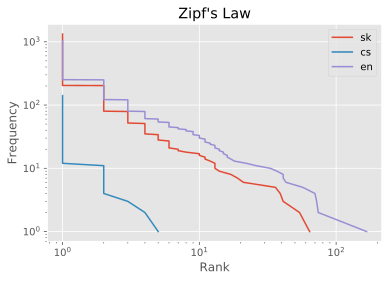

In [4]:
do_law_of_zipf(data_raw) #function defined in 'helper_code'
#shows the linearility of each Languages, 'cs' is not so linear (data size is too small compared with others)
#which is a bias, and may cause problems in model 

<a id='task2'></a>
# Task 2: Data Cleaning and Preprocessing

In [5]:
def preprocess(text):
    '''
    Removes punctuation and digits from a string, and converts all characters to lowercase. 
    Also clears all \n and hyphens (splits hyphenated words into two words).
    
    '''        
    preprocessed_text = text.lower().replace('-', ' ')
    #convert every letter to lower letter, then replace '-' with space('').
    
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits)
    
    #remove punctuations : use a table(dictionaries),with keys and values, key_value: a, Text covert to key value
    #convert new line into 'space', convert string.punctuation+string.digits to null. 
    preprocessed_text = preprocessed_text.translate(translation_table)
    #apply this translate table     
    return preprocessed_text
#change your stratage depending on your dataset, laguwages, and so on

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
string.digits

'0123456789'

In [6]:
data_preprocessed = {k: [preprocess(sentence) for sentence in v] 
                     for k, v in data_raw.items()}
#creat a dict: k is the key(language), v is value (a list, sentences)

In [16]:
show_statistics(data_raw)
print('------------------ Compare raw data with the processed ones:')
show_statistics(data_preprocessed)
#unique words decreased, because we processed the data 

Language: sk
Pán de Grandes Pascual jasne vysvetlil, aká je pridaná hodnota definície terorizmu, vyjadrením, že definícia, ktorú sme používali predtým, bola dôležitejšia, ale aj tým, že trval na zozname priestupkov.

-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 PándeGrandesPascualjasnevysvetlil,aká...

Language: cs
Upozorňujeme, že jejím cílem je šetřit penězi za administrativní výdaje.

-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme,žejejímcílemješetřitpenězi...

Language: en
I can understand your approach a little bit.

-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 Icanunderstandyourapproachalittle...

------------------ Compare raw data with the processed ones:
Language: sk
pán de grandes pascual jasne vysvetlil aká je pridaná hodnota de

<a id='task3'></a>
# Task 3: The Naive Bayes Model

**Bayes' Theorem**

\begin{equation}
P(A | B)=\frac{P(B | A) \times P(A)}{P(B)}
\end{equation}

Where P(A) is the probability of A, this is the belief on A; P(B | A) is likelihood, P(A | B) is posterior. P(B) is the marginalization. 

**Naive Bayes classifier**

Naive Bayes is a family of algorithms based on applying Bayes theorem with a strong(naive) assumption: every feature is independent of the others, to predict the category of a given sample. They are probabilistic classifiers, therefore will calculate the probability of each category using Bayes theorem, and the category with the highest probability will be output. 

\begin{equation}
P(\text {CLASS} | \text {DATA})=\frac{P(\text {DATA} | \text {CLASS}) \times P(\text {CLASS})}{P(\text {DATA})}
\end{equation}

P( DATA |  CLASS ) is Guassian because it is normal distribution. 

Now, let's translate this theory into our specific problem. In our case, where we want to categorise a sentence `my name is Ari` into one of `sk`, `cs`, or `en`, the following are the probabilities we want to determine.

\begin{equation}
P(\text {sk} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {sk}) \times P(\text {sk})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {cs} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {cs}) \times P(\text {cs})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {en} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {en}) \times P(\text {en})}{P(\text {my name is Ari})}
\end{equation}

Bayes model is a bag of words model. Since we only care which probability is the highest, we don’t care the actual values, the denorminator: P(DATA) can be ignored (constant), we don't calculate it.
In our dataset: P(cs) << P(en) or P(sk), which might cause a problem.

## Unseen Data

Since we assume conditional independence across our features, our numerator term for any of the above equations can be broken into the following.

\begin{equation}
P(\text {my name is Ari} | \text {en}) = P(\text {my} | \text {en}) \times P(\text {name} | \text {en}) \times P(\text {is} | \text {en}) \times P(\text {Ari} | \text {en})
\end{equation}

If P(Ari|en)=0 (For example: English doesn’t have this word 'Ari'), P(sentence|en)=0 .
To avoid this, use: Laplace smoothing , which is a technique for smoothing categorical data. 
A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. in the general case it is called Lidstone smoothing.

https://en.wikipedia.org/wiki/Additive_smoothing

Given an observation ${\textstyle \textstyle {\mathbf {x} \ =\ \left\langle x_{1},\,x_{2},\,\ldots ,\,x_{d}\right\rangle }}$ from a multinomial distribution with ${\textstyle \textstyle {N}} $  trials, parameter vector θ = (θ1, …, θd),  a "smoothed" version of the data gives the estimator:
\begin{equation}
{\hat {\theta }}_{i}={\frac {x_{i}+\alpha }{N+\alpha d}}\qquad (i=1,\ldots ,d),
\end{equation}
where the "pseudocount" α > 0 is a smoothing parameter. α = 0 corresponds to no smoothing. 
Additive smoothing is a type of shrinkage estimator, as the resulting estimate will be between the empirical probability (relative frequency) ${\textstyle \textstyle {x_{i}/N}}$  and the uniform probability ${\textstyle \textstyle {1/d}}$. Invoking Laplace's rule of succession, some authors have argued that α should be 1, though in practice a smaller value is typically chosen.

If the frequency of each item ${\textstyle \textstyle {i}}$   is ${\displaystyle \textstyle {x_{i}}}$ out of ${\textstyle \textstyle {N}}$ samples, the empirical probability of event ${\textstyle \textstyle {i}}$  
\begin{equation}
{\displaystyle p_{i,\ \mathrm {empirical} }={\frac {x_{i}}{N}}}
\end{equation}
but the posterior probability when additively smoothed is
\begin{equation}
{\displaystyle p_{i,\ \alpha {\text{-smoothed}}}={\frac {x_{i}+\alpha }{N+\alpha d}},}
\end{equation}
as if to increase each count ${\displaystyle \textstyle {x_{i}}} $ by ${\displaystyle \textstyle {\alpha }}$ a priori.

Depending on the prior knowledge, which is sometimes a subjective value, a pseudocount may have any non-negative finite value. 

## Vectorizing Training Data
Bag of words model

|Sentence   	||   my   	| is 	| I 	| love 	| name 	| it 	| Ari 	|
|-----------------	||:------:	|:--:	|:-:	|:----:	|:----:	|:--------:	|:---:	|
| my name is Ari  	||    1   	|  1 	| 0 	|   0  	|   1  	|     0    	|  1  	|
| I love it 	||    0   	|  0 	| 1 	|   1  	|   0  	|     1    	|  0  	|

In [7]:
sentences_train, y_train = [], []
# sentences_train: creat a list of inputs: sentences in dataraw will be stored 
#y_train: lists of outputs: keys('sk','cs','en') in dataraw will be stored
for k, v in data_preprocessed.items():
    # k: key, v: values - a list of sentences 
    for sentence in v:
        sentences_train.append(sentence) # sentences in dataraw  stored
        y_train.append(k)   #keys('sk','cs','en') in dataraw stored

In [9]:
vectorizer = CountVectorizer()
#conver our sentences into vector

In [14]:
sentences_train

['pán de grandes pascual jasne vysvetlil aká je pridaná hodnota definície terorizmu vyjadrením že definícia ktorú sme používali predtým bola dôležitejšia ale aj tým že trval na zozname priestupkov ',
 'keby sme sa nepokúsili o nemožné ako by sme mohli dosiahnuť zmenu ',
 'oznámil že budúci týždeň sa zúčastní schôdze výboru pre zahraničné veci ',
 'niekedy by sa mohlo zdať že ide o hru alebo pokrytectvo ',
 'jej účelom je tiež identifikovať akékoľvek slabé miesta v systéme a právne nedostatky súdnej spolupráce v trestných veciach aby sa európskym zákonodarcom poskytli všetky informácie potrebné na správne politické a regulačné hodnotenie ',
 'na dosiahnutie tohto cieľa je mimoriadne dôležité aby členské štáty zaviedli prijaté opatrenia a úzko spolupracovali ',
 'fr pani predsedajúca pán predseda barroso nám stanovil náročný cieľ v oblasti výroby obnoviteľnej energie s cieľom znížiť emisie skleníkových plynov bez toho aby sa brzdili naše vyhliadky na rast ',
 'táto požiadavka však nie je

In [11]:
X_train = vectorizer.fit_transform(sentences_train) #sentences_train is X
#stored the trained data (vector), fit_transform(): Fit to data, then transform it.
#scikit-learn: fit_transform(self, X, y=None, **fit_params)[source]
#Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
#X: numpy array of shape [n_samples, n_features]  Training set.
#y: numpy array of shape [n_samples]  Target values.
#**fit_paramsdict - Additional fit parameters.
#Returns: X_new: numpy array of shape [n_samples, n_features_new] Transformed array.

In [11]:
y_train

['sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'sk',
 'cs',
 'cs',
 'cs',
 'cs',
 'cs',
 'cs',
 'cs',
 'cs',
 'cs',
 'cs',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',

In [13]:
X_train

<210x2208 sparse matrix of type '<class 'numpy.int64'>'
	with 3867 stored elements in Compressed Sparse Row format>

## Initializing Model Parameters and Training
Building a multinomial Naive Bayes classifier to solve a typical NLP problem.

In [12]:
naive_classifier = MultinomialNB()
# bulit a model 
naive_classifier.fit(X_train, y_train)
#fit our data
#alpha: smoothing constant (0,1). Default=1: lapalacian smothing, taking into account 
#for unseen data  in our dataset.
#alpha: hyperparameter parameter, we can choose another value when validating our model to improve performance 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Vectorizing Validation Data and Evaluating Model

In [13]:
data_val = dict()
#create a dict , same steps as our training data 
data_val['sk'] = open_file('Data/Sentences/val_sentences.sk')
data_val['cs'] = open_file('Data/Sentences/val_sentences.cs')
data_val['en'] = open_file('Data/Sentences/val_sentences.en') #reading Validation Data
data_val_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_val.items()}
#creat a dict for preprocessing as before 

In [17]:
data_val

{'sk': ['Environmentálne hodnotenie zlučiteľnosti v počiatočnej fáze, pri rozvoji projektu, znamená, že môžeme predísť akýmkoľvek nepriaznivým dôsledkom skôr, ako by sme s nimi bojovali v neskoršej fáze.\n',
  'Ďakujem za rozpravu.\n',
  'Ďalším dôležitým bodom je skutočnosť, že sa tu uplatňuje článok 306, samozrejme aj vrátane krajín Beneluxu, pán Sterckx, čo znamená, že vaša požiadavka je zbytočná a už ju nemusíme podporiť.\n',
  'Problém spočíval v tom, že tieto finančné prostriedky sa často využívali na stavbu a prestavbu veľkých inštitúcií, a nie na integrované bývanie.\n',
  'Chcem zdôrazniť, že ak chceme o týchto veciach diskutovať, musíme vážne prehĺbiť niektoré svoje pohľady, minimálne v niektorých veciach.\n',
  'Po druhé musí verejná sféra - konkrétnejšie Európska únia a jej členské štáty - spolu so subjektmi jadrového priemyslu prijať etiku správania, ktoré prinesie úplnú transparentnosť v súvislosti s jadrovými aktivitami.\n',
  'Doposiaľ EÚ realizovala vo východnom Jeruza

In [14]:
#same procedure as before
sentences_val, y_val = [], []
for k, v in data_val_preprocessed.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [16]:
X_val = vectorizer.transform(sentences_val)
#don't fit, we want the dimensions features to be the same as before 

In [17]:
predictions = naive_classifier.predict(X_val)
#get predictions from our model 

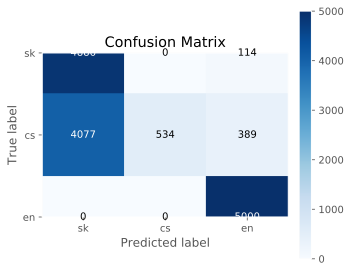

In [18]:
plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'en']) #function defined in helper_code
#one way to visulize it (true values, predicts), diag: correct prediction.
#cs is been mistakenly regarded as sk (4077) is too high, the two lags are similar.

In [19]:
f1_score(y_val, predictions, average='weighted') #F1 score (F-score or F-measure) is a measure of a test's accuracy. 
#f1_score=geometrical mean of your recall and presision 

0.6149824401040264

<img src="precision.PNG">
<img src="recall.PNG">
<img src="f1.PNG">

![](p1.png)

<a id='task4'></a>
# Task 4: Simple Adjustments and Highlighting Model Shortcomings

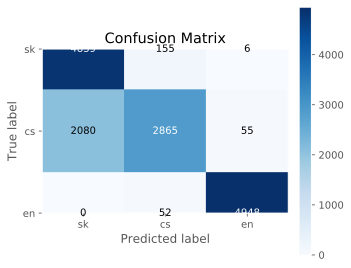

In [20]:
naive_classifier = MultinomialNB(alpha=0.0001, fit_prior=False)
#modify model, change alpha: try diff values, which one works better, 
#there is a bias in traning data: becuase we have less 'cs' data, so don't fit prior here: 
#give each lagugage equal probalilty of oaccuring P(sk)=P(cs)=P(en)
naive_classifier.fit(X_train, y_train)

predictions = naive_classifier.predict(X_val)

plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])

In [21]:
f1_score(y_val, predictions, average='weighted')

0.8368507601649364

Better performance: the F1 score: imporved from 0.6149824401040264 to 0.8368507601649364

<a id='task5'></a>
# Task 5: Using Subwords to Shift Perspective

From paper https://arxiv.org/abs/1508.07909
Neural machine translation (NMT) models typically operate with a fixed vocabulary, but translation is an open-vocabulary problem. Previous work addresses the translation of out-of-vocabulary words by backing off to a dictionary. 
In this paper, we introduce a simpler and more effective approach, making the NMT model capable of open-vocabulary translation by encoding rare and unknown words as sequences of subword units. 
This is based on the intuition that various word classes are translatable via smaller units than words.

For example, consider compounds such as the German Abwasser|behandlungs|anlange ‘sewage water treatment plant’, for which a segmented, variable-length representation is intuitively more appealing than encoding the word as a fixed-length vector.

1. The subword models achieve better accuracy for the translation of rare words than large-vocabulary models and back-off dictionaries, and are able to productively generate new words that were not seen at training time. 
The neural networks are able to learn compounding and transliteration from subword representations.

2. Adapt byte pair encoding (BPE) (Gage,1994), a compression algorithm, to the task of word segmentation. BPE allows for the representation of an open vocabulary through a fixed-size vocabulary of variable-length character sequences, making it a very suitable word segmentation strategy for neural network models.

**Dummy Dataset**

playing ; eating ; play ; reads ; tea

**Step 1**

Break each word into characters

playing > p l a y i n g


**Step 2**

Find common character sequences

ea, ing, play

**Step 3**

Convert dataset using these subwords into

play ing ; ea t ing ; play ; r ea d s ; t ea


1. using subwords in NLP, neural machine translation 
2. translate words not seen in the training dataset
3. using subwords to translate some pieces of big words, to obtain better performace

In [22]:
# taken from https://arxiv.org/abs/1508.07909  Algorithm 1 Learn BPE operations
import re, collections

def get_stats(vocab):
    pairs = collections.defaultdict(int) 
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq 
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word] 
    return v_out

In [23]:
def get_vocab(data):

    words = []
    for sentence in data:
        words.extend(sentence.split()) 
      
    vocab = defaultdict(int) 
#Setting the default_factory to int makes defaultdict useful for counting (like a bag or multiset in other languages):
# dict of words and how oftten they appeared in our datasets
    for word in words:
        vocab[' '.join(word)] += 1
        
    return vocab

In [25]:
vocab = get_vocab(sentences_train)
vocab

defaultdict(int,
            {'p á n': 8,
             'd e': 5,
             'g r a n d e s': 1,
             'p a s c u a l': 1,
             'j a s n e': 1,
             'v y s v e t l i l': 1,
             'a k á': 1,
             'j e': 31,
             'p r i d a n á': 1,
             'h o d n o t a': 1,
             'd e f i n í c i e': 1,
             't e r o r i z m u': 1,
             'v y j a d r e n í m': 1,
             'ž e': 43,
             'd e f i n í c i a': 1,
             'k t o r ú': 2,
             's m e': 11,
             'p o u ž í v a l i': 1,
             'p r e d t ý m': 1,
             'b o l a': 3,
             'd ô l e ž i t e j š i a': 1,
             'a l e': 6,
             'a j': 6,
             't ý m': 4,
             't r v a l': 1,
             'n a': 41,
             'z o z n a m e': 1,
             'p r i e s t u p k o v': 1,
             'k e b y': 2,
             's a': 40,
             'n e p o k ú s i l i': 1,
             'o': 19,
       

In [26]:
# also taken from original paper
for i in range(100): #num_merges=100 is hyperparameter, can be changed to increase performance
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get) 
    vocab = merge_vocab(best, vocab)
#update vocab

In [27]:
merges = defaultdict(int)
for k, v in vocab.items():
    for subword in k.split():
        if len(subword) >= 2:
            merges[subword] += v
#find which merges occuring more often 

In [30]:
merge_ordered = sorted(merges, key=merges.get, reverse=True)
merge_ordered

['re',
 'st',
 'in',
 'the',
 'to',
 'an',
 'en',
 'po',
 'al',
 'is',
 'er',
 'it',
 'ro',
 'ed',
 'ov',
 'ne',
 'ch',
 'ie',
 'ia',
 'pr',
 'om',
 'ar',
 'ou',
 'on',
 'le',
 'pre',
 'na',
 'ce',
 've',
 'je',
 'me',
 'and',
 'of',
 'as',
 'de',
 'at',
 'li',
 'ho',
 'pro',
 'sk',
 'ing',
 'or',
 'th',
 'la',
 'ion',
 'for',
 'by',
 'ci',
 'do',
 'ur',
 'se',
 'že',
 'il',
 'ra',
 'sa',
 'te',
 'vo',
 'no',
 'ent',
 'ic',
 'ak',
 'mo',
 'be',
 'lo',
 'áv',
 'pe',
 'ct',
 'ment',
 'né',
 'so',
 'that',
 'vy',
 'si',
 'mi',
 'ly',
 'ation',
 'we',
 'ých',
 'mu',
 'wh',
 'bu',
 'ke',
 'im',
 'ktor',
 'sti',
 'ul',
 'ate',
 'av',
 'con',
 'ad',
 'bo',
 'aj',
 'not',
 'ss',
 'port',
 'ri',
 'vý',
 'ať',
 'por',
 'kto']

In [32]:
pkl.dump(merge_ordered, open('Data/Auxiliary/merge_ordered.pkl', 'wb'))
#saved the data : merge_ordered as a file called 'merge_ordered.pkl'

In [31]:
def split_into_subwords(text):
    merges = pkl.load(open('Data/Auxiliary/merge_ordered.pkl', 'rb'))
    subwords = []
    for word in text.split():
        for subword in merges:
            subword_count = word.count(subword)
            if subword_count > 0:
                word = word.replace(subword, ' ')
                subwords.extend([subword]*subword_count)
    return ' '.join(subwords)
#takes in sentences, apply and returns only subwords 

In [34]:
split_into_subwords('this is ari here')
# returns the important subwords in our training dataset 

'is th is ar re'

In [36]:
split_into_subwords('this is scalby bdthaksal here')

'is th is al by al th ak re'

In [37]:
split_into_subwords('hello my name is ari')

'lo na me is ar'

In [39]:
data_preprocessed_subwords = {k: [split_into_subwords(sentence) for sentence in v] for k, v in 
                              data_preprocessed.items()}
#apply 2nd data preprocessing on our 1st data_preprocessed
data_preprocessed_subwords

{'sk': ['de an de al as ne as ve li vy ak je an pr ho no in ie de er or mu re vy ad že in ia de to me po al re la bo it ia le al aj že al na na me st ov ie pr',
  'by ke me sa po ne li si ne mo né ak by me li mo ia do en',
  'il že ci bu de sa st ch or vý re an né ve ci',
  'ed ie by sa mo lo ať že de al bo po te vo ct',
  'je om je ie en ov ať ve ak la st ie st me ne pr áv st ed at ne po pr ce re st ch ch ia ve by sa sk ur om ar on po li sk in ie or re po né na ne pr áv po it ic re la né en ie ho no',
  'na ie ia do to to ie je ne ia or mi it le by en sk ed li av pr at re ia at po al ov pr',
  'an re ed aj re ed ro ar so st an ov il ro ie st la ro by vý it ov ne en er ie ie om is ie en ov ch sk ov ly be to ho by sa li na ia vy na st ra',
  'to po ia av ak ie je st to ne do ne pr an ov or mu po ia de om sk',
  'pr vo aj en an re ed aj is ia ro vý ch mo ov le te mi li re en ed že re po né pr av že re po né il né po ia av to by sa li mo st ať in po mi že je re po il en ra',
  'ne me mu v

In [40]:
show_statistics(data_preprocessed_subwords)

Language: sk
de an de al as ne as ve li vy ak je an pr ho no in ie de er or mu re vy ad že in ia de to me po al re la bo it ia le al aj že al na na me st ov ie pr
-----------------------
Number of sentences	:	 100
Number of words		:	 3431
Number of unique words	:	 75
Sample extract		:	 deandealasneas...

Language: cs
po je me or že je le je it en st in at ad je vý
-----------------------
Number of sentences	:	 10
Number of words		:	 239
Number of unique words	:	 59
Sample extract		:	 pojemeoržejele...

Language: en
an st an er ou ro ch it le it
-----------------------
Number of sentences	:	 100
Number of words		:	 3863
Number of unique words	:	 75
Sample extract		:	 anstanerouroch...



In [41]:
data_train_subwords = []
for sentence in sentences_train:
    data_train_subwords.append(split_into_subwords(sentence))
#train_data

In [42]:
data_val_subwords = []
for sentence in sentences_val:
    data_val_subwords.append(split_into_subwords(sentence))
#validation data 

In [43]:
vectorizer = CountVectorizer()
#treat is as a new laguage(subwords)

In [44]:
X_train_subwords = vectorizer.fit_transform(data_train_subwords)
X_val_subwords = vectorizer.transform(data_val_subwords)

In [45]:
naive_classifier = MultinomialNB(alpha=1.0, fit_prior=False)
#play with alpha(0,1)
naive_classifier.fit(X_train_subwords, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [46]:
predictions_subwords = naive_classifier.predict(X_val_subwords)

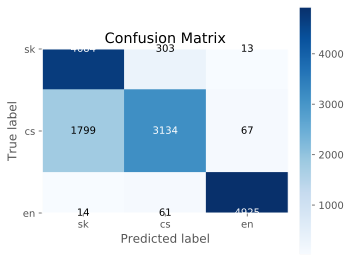

In [47]:
plot_confusion_matrix(y_val, predictions_subwords, ['sk', 'cs', 'en'])

In [48]:
f1_score(y_val, predictions_subwords, average='weighted')

0.8456381060126386

Better performance-F1 score: imporved from  0.8368507601649364 to 0.8456381060126386

In [50]:
#save our final model locally 
joblib.dump(naive_classifier,'Data/Models/final_model.joblib')
joblib.dump(vectorizer,'Data/Vectorizers/final_model.joblib')

['Data/Vectorizers/final_model.joblib']

# Load Model

In [52]:
model=joblib.load('Data/Models/final_model.joblib')
vectorizer = joblib.load('Data/Vectorizers/final_model.joblib')

In [61]:
#Test model
#test ='Additionally, several creoles, patois, and pidgins are based on Dutch, English and German as they were languages of colonial empires.'
#english
#test ='Dle známých dokumentů bylo území s latinským názvem Germania obydleno několika germánskými kmeny již před rokem 100 n. l. Od 10. století tvořila německá území jádro Svaté říše římské, která existovala až do roku 1806. V 16. '
#czech
test = 'Podľa známych dokumentov bolo územie s názvom Germánia osídlené niekoľkými germánskymi kmeňmi už pred rokom 100 n. l. Od 10. storočia tvorilo nemecké územie jadro Rímsko-nemeckej ríše, ktorá existovala až do roku 1806. V 16. storočí sa severné oblasti stali centrom reformácie.'
#slovak
#test ='哈哈哈，试一下'
test = preprocess_function(test) #defined in helper_code
test = [split_into_subwords(test)]
test_vectorized = vectorizer.transform(test)
model.predict(test_vectorized)

array(['sk'], dtype='<U2')